In [138]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.signal import find_peaks
from matplotlib import pyplot as plt
import seaborn as sns

from src.lif import lif_compute, spike_binary
from src.ou_process import ouprocess_gaussian
from src.spike_sync import find_synced_spikes

sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
NUM_NEURONS = 1000 # 100
tau_V = 10
R = 1 # MOhm
EL = -70.0
V_th = -40.0
dt = 0.1 # msec
t_stop = 1.0e3 # 50.0e3
tt = np.arange(0.0, t_stop, dt)
# p.dt = dt; p.tStop = t_stop; ????????
tw = 100.0

In [140]:
V = np.zeros((tt.shape[0], NUM_NEURONS)) # Membrane potential per neuron

# Additive noise to individual neurons
ETA, _ = ouprocess_gaussian(5.0, dt, t_stop, NUM_NEURONS)

In [141]:
# Slow Signal
input_slow, _ = ouprocess_gaussian(50.0, dt, t_stop, 1)
i_inj = 16.0 + 6.0*input_slow

F_binary = np.zeros((tt.shape[0], NUM_NEURONS))
avg_firing_rate = np.zeros(NUM_NEURONS)
a2 = 25.0 # pA; std of noise

I_total = a2*ETA + i_inj

for k in range(0, NUM_NEURONS):
    V[:,k] = lif_compute(I_total[:, k], R, tau_V, V_th, dt)

In [142]:
F_binary = spike_binary(V)
avg_firing_rate = np.sum(F_binary, axis=0)/(t_stop/1.0e3)

(array([ 13.,  43., 124., 299., 207., 164., 118.,  25.,   6.,   1.]),
 array([ 5. ,  7.3,  9.6, 11.9, 14.2, 16.5, 18.8, 21.1, 23.4, 25.7, 28. ]),
 <a list of 10 Patch objects>)

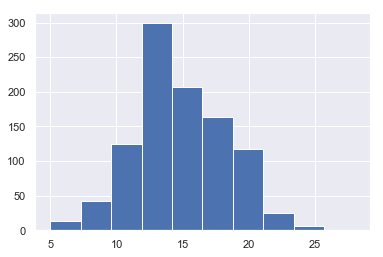

In [143]:
plt.hist(avg_firing_rate)

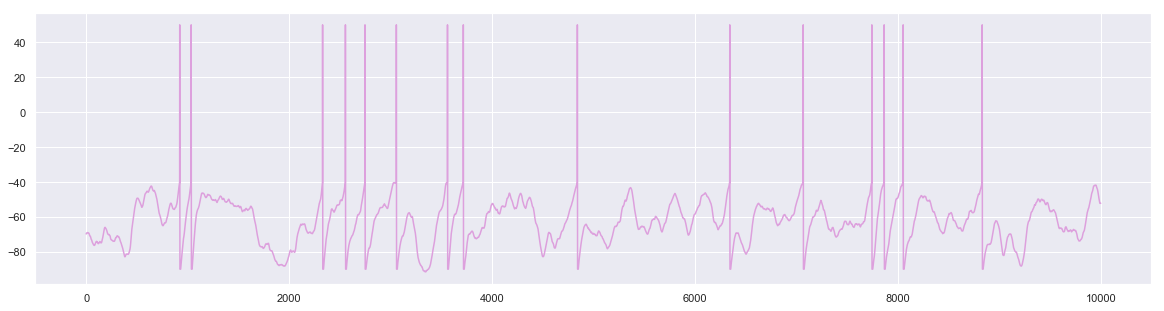

In [144]:
trial = 10
plt.figure(figsize=(20,5))
plt.plot(V[:,trial], color='plum')
# plt.plot(F_binary[:,trial] * 40.0)
plt.show()

In [145]:
F_binary.shape

(9999, 1000)

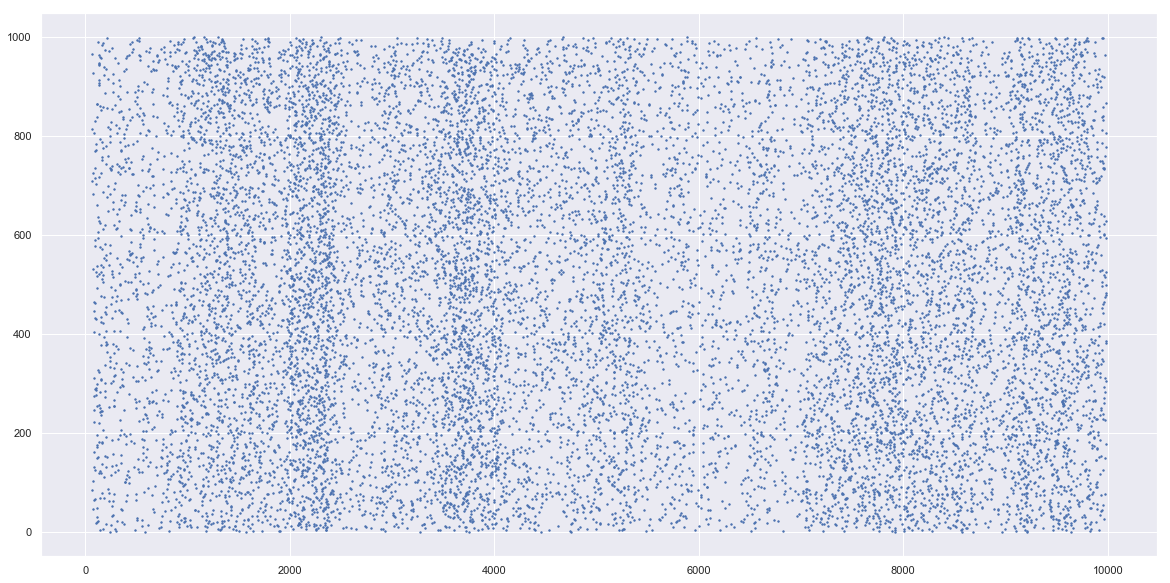

In [146]:
spike_inds, spike_trial = np.where(F_binary > 0)
plt.figure(figsize=(20,10))
plt.scatter(spike_inds, spike_trial, s=2)

In [147]:
# ind = 0*1e3/p.dt+1:10*1e3/p.dt;
# q=2;
percentage_sync = 0.5
window_sync = 5
TW = 1
psth_total = np.sum(F_binary,axis=1) # Sum of spikes from all neurons at a given t
# psth_ = psth_total(ind);
indx_async, indx_sync, sync_event, M_S = find_synced_spikes(psth_total, percentage_sync, window_sync, TW, NUM_NEURONS, dt, t_stop)
# sig_sync = M_S;
# sig_async = not M_S;
# Sig_T{1}=sig_async(ind);
# Sig_T{2}=sig_sync(ind);
# sig_sync

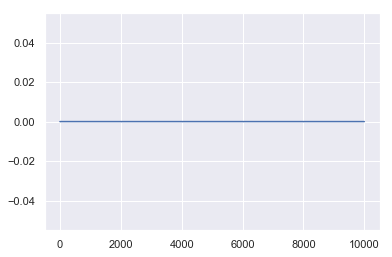

In [149]:
plt.plot(M_S)

In [12]:
# TESTING OUT VECTORIZED
k = 0
I_total = i_inj + a2*ETA[:,k]
V[:,k] = lif_compute(I_total, R, tau_V, V_th, dt)
V_selected = V[:, k, None]